## HR Analytics Project- Understanding the Attrition in HR
    

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\github_repo\Files")
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.head(),df.tail(),df.sample()
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Exploratory Data Analysis(EDA)

<AxesSubplot:>

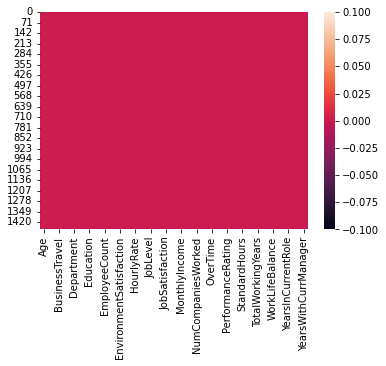

In [7]:
sns.heatmap(df.isnull()) #heatmap

We can see that there is no null value presented in our data set.

In [8]:
# there is  column employe number in the dataset that we can drop as it does not helps so we drop
df.drop(columns=["EmployeeNumber"],inplace=True)

In [9]:
df.drop(columns=["Over18"],inplace=True)

# Exploratory Data Analysis (EDA)¶


## Univariate Analysis


### Visualizing the Categorical Columns

No     1233
Yes     237
Name: Attrition, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


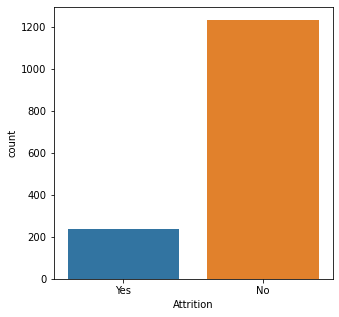

In [10]:
#Visualize the number of employes who stayed and left the company
print(df["Attrition"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Attrition"])
plt.show()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


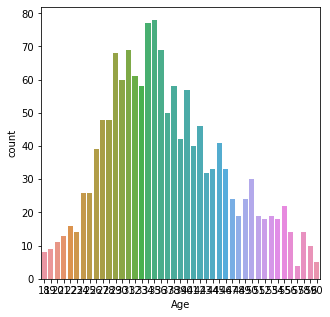

In [11]:
#Visualize the number of employes who stayed and left the company
print(df["Age"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Age"])
plt.show()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


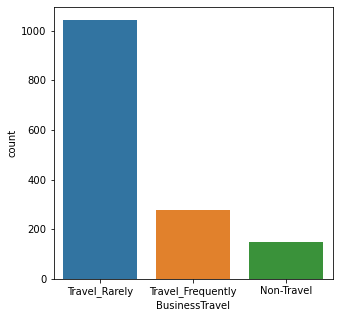

In [12]:
#Visualize the number of employes who stayed and left the company
print(df["BusinessTravel"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["BusinessTravel"])
plt.show()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


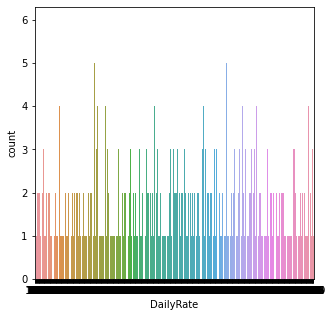

In [13]:
#Visualize the number of employes who stayed and left the company
print(df["DailyRate"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["DailyRate"])
plt.show()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


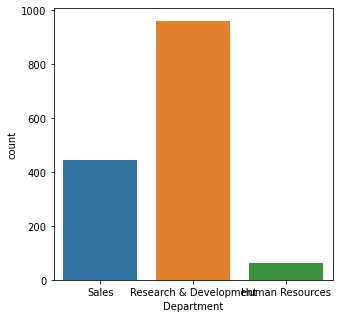

In [14]:
#Visualize the number of employes who stayed and left the company
print(df["Department"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Department"])
plt.show()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


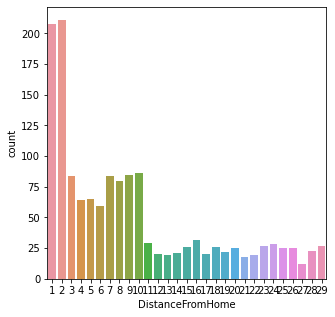

In [15]:
#Visualize the number of employes who stayed and left the company
print(df["DistanceFromHome"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["DistanceFromHome"])
plt.show()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


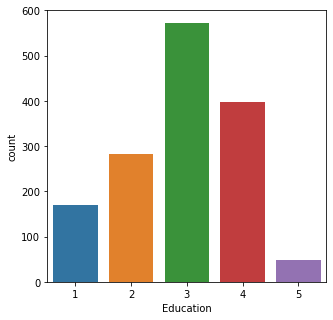

In [16]:
#Visualize the number of employes who stayed and left the company
print(df["Education"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Education"])
plt.show()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


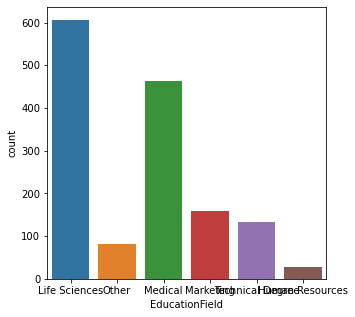

In [17]:
#Visualize the number of employes who stayed and left the company
print(df["EducationField"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["EducationField"])
plt.show()


1    1470
Name: EmployeeCount, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


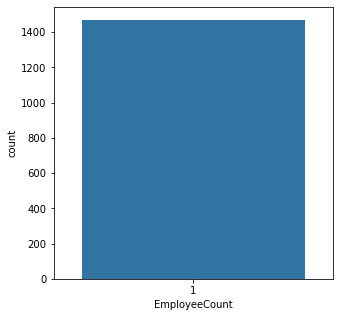

In [18]:
#Visualize the number of employes who stayed and left the company
print(df["EmployeeCount"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["EmployeeCount"])
plt.show()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


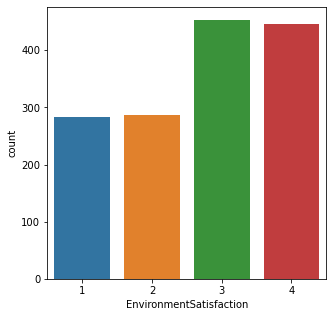

In [19]:
#Visualize the number of employes who stayed and left the company
print(df["EnvironmentSatisfaction"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["EnvironmentSatisfaction"])
plt.show()


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      882
Female    588
Name: Gender, dtype: int64


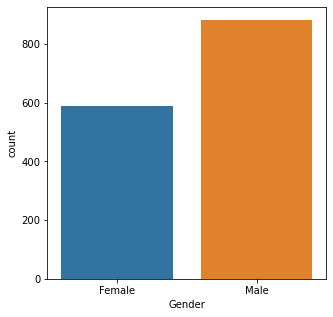

In [20]:
#Visualize the number of employes who stayed and left the company
print(df["Gender"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Gender"])
plt.show()

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


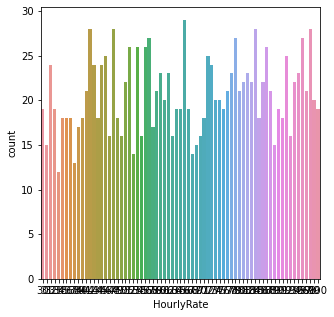

In [21]:
#Visualize the number of employes who stayed and left the company
print(df["HourlyRate"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["HourlyRate"])
plt.show()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


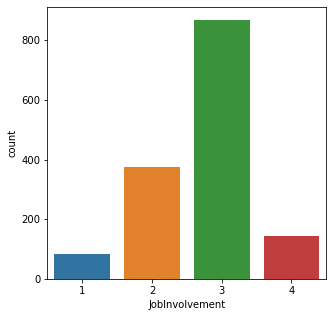

In [22]:
#Visualize the number of employes who stayed and left the company
print(df["JobInvolvement"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["JobInvolvement"])
plt.show()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


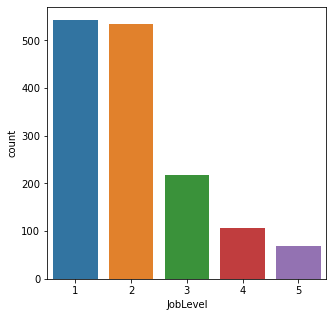

In [23]:
#Visualize the number of employes who stayed and left the company
print(df["JobLevel"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["JobLevel"])
plt.show()

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


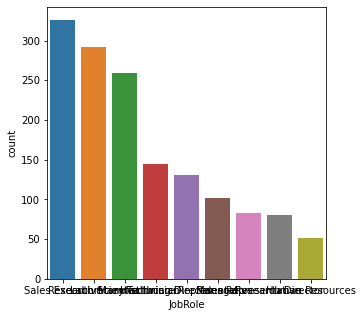

In [24]:
#Visualize the number of employes who stayed and left the company
print(df["JobRole"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["JobRole"])
plt.show()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


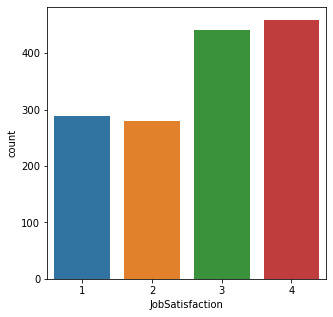

In [25]:
#Visualize the number of employes who stayed and left the company
print(df["JobSatisfaction"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["JobSatisfaction"])
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


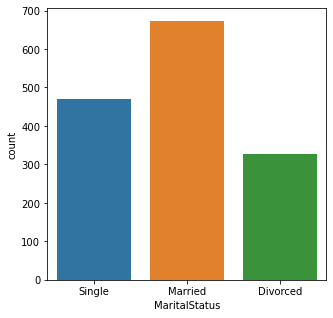

In [26]:
#Visualize the number of employes who stayed and left the company
print(df["MaritalStatus"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["MaritalStatus"])
plt.show()

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64


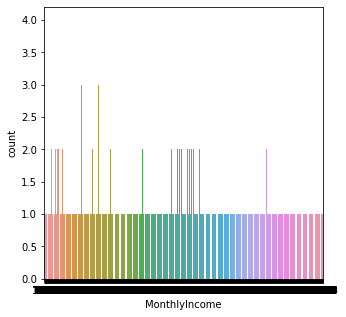

In [27]:
#Visualize the number of employes who stayed and left the company
print(df["MonthlyIncome"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["MonthlyIncome"])
plt.show()

4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: MonthlyRate, Length: 1427, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


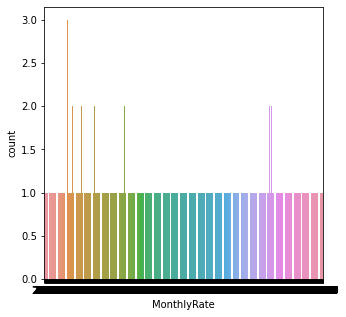

In [28]:
#Visualize the number of employes who stayed and left the company
print(df["MonthlyRate"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["MonthlyRate"])
plt.show()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


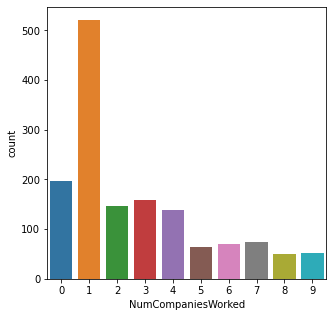

In [29]:
#Visualize the number of employes who stayed and left the company
print(df["NumCompaniesWorked"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["NumCompaniesWorked"])
plt.show()

No     1054
Yes     416
Name: OverTime, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


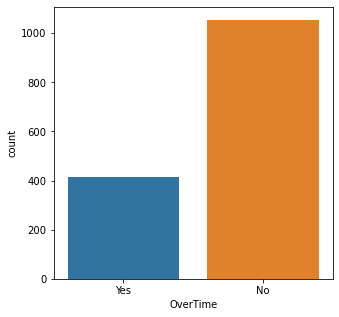

In [30]:
#Visualize the number of employes who stayed and left the company
print(df["OverTime"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["OverTime"])
plt.show()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


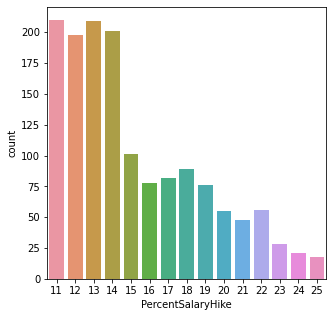

In [31]:
#Visualize the number of employes who stayed and left the company
print(df["PercentSalaryHike"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["PercentSalaryHike"])
plt.show()

3    1244
4     226
Name: PerformanceRating, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


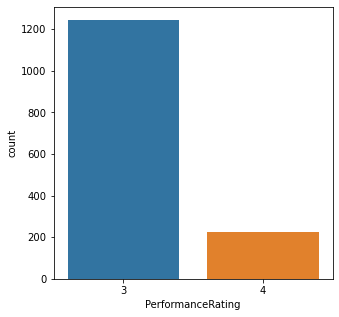

In [32]:
#Visualize the number of employes who stayed and left the company
print(df["PerformanceRating"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["PerformanceRating"])
plt.show()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


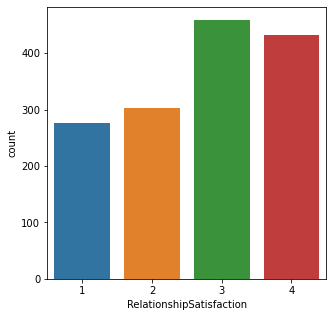

In [33]:
#Visualize the number of employes who stayed and left the company
print(df["RelationshipSatisfaction"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["RelationshipSatisfaction"])
plt.show()

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    1244
4     226
Name: PerformanceRating, dtype: int64


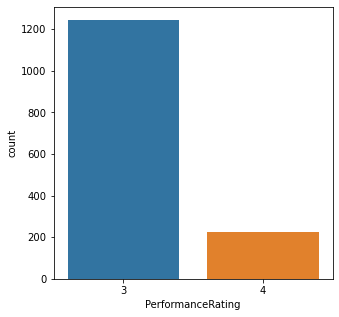

In [34]:
#Visualize the number of employes who stayed and left the company
print(df["PerformanceRating"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["PerformanceRating"])
plt.show()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


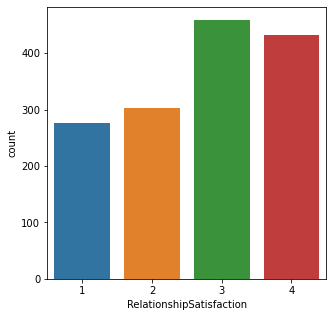

In [35]:
#Visualize the number of employes who stayed and left the company
print(df["RelationshipSatisfaction"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["RelationshipSatisfaction"])
plt.show()

80    1470
Name: StandardHours, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


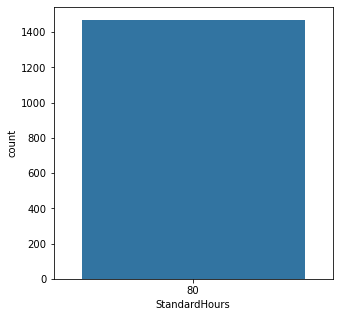

In [36]:
#Visualize the number of employes who stayed and left the company
print(df["StandardHours"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["StandardHours"])
plt.show()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


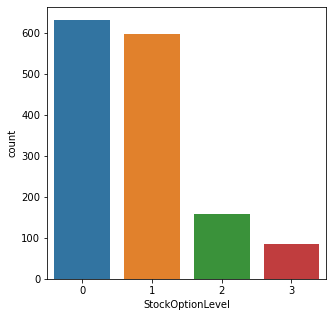

In [37]:
#Visualize the number of employes who stayed and left the company
print(df["StockOptionLevel"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["StockOptionLevel"])
plt.show()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


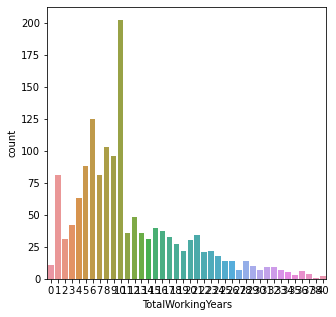

In [38]:
#Visualize the number of employes who stayed and left the company
print(df["TotalWorkingYears"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["TotalWorkingYears"])
plt.show()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


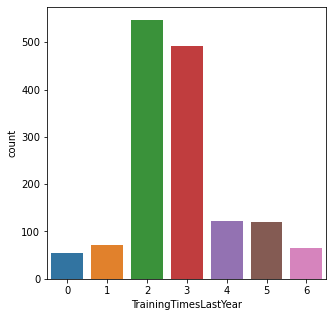

In [39]:
#Visualize the number of employes who stayed and left the company
print(df["TrainingTimesLastYear"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["TrainingTimesLastYear"])
plt.show()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


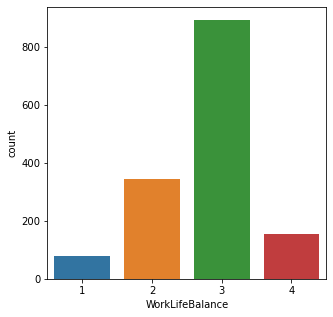

In [40]:
#Visualize the number of employes who stayed and left the company
print(df["WorkLifeBalance"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["WorkLifeBalance"])
plt.show()

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64


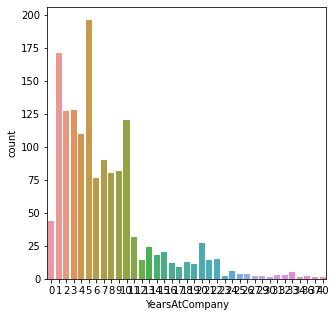

In [41]:
#Visualize the number of employes who stayed and left the company
print(df["YearsAtCompany"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["YearsAtCompany"])
plt.show()


2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


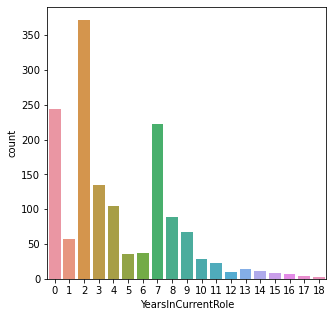

In [42]:
#Visualize the number of employes who stayed and left the company
print(df["YearsInCurrentRole"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["YearsInCurrentRole"])
plt.show()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


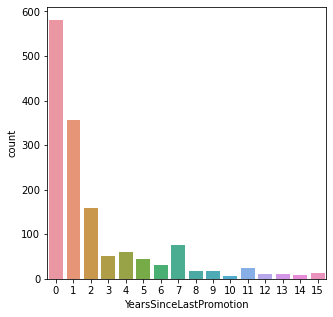

In [43]:
#Visualize the number of employes who stayed and left the company
print(df["YearsSinceLastPromotion"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["YearsSinceLastPromotion"])
plt.show()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


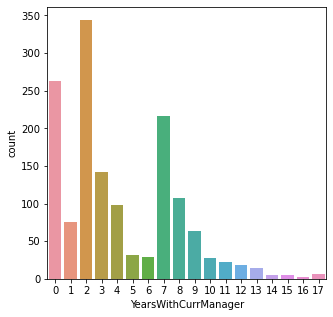

In [44]:
#Visualize the number of employes who stayed and left the company
print(df["YearsWithCurrManager"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["YearsWithCurrManager"])
plt.show()

## VIOLINPLOT(PLOTTING B/W FEATURES AND LABLE)

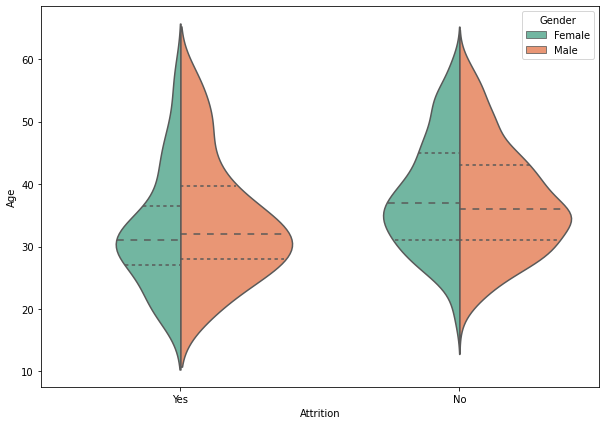

In [45]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

from above we can say that both male and female has wide range in age between 20 and 30

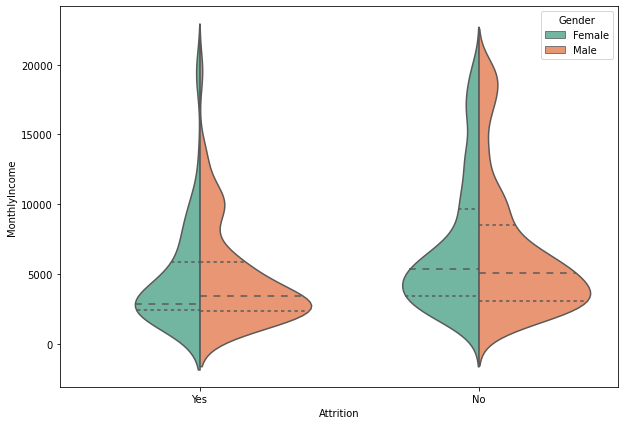

In [46]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

from above we have observation that most of male and female are having Monthlyincome less than 5000

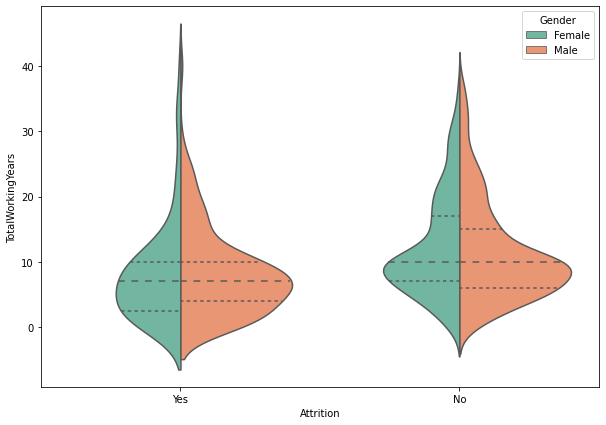

In [47]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

from the above observation male and female mostly have Totlaworkexperienve in between range 0 to 10 years

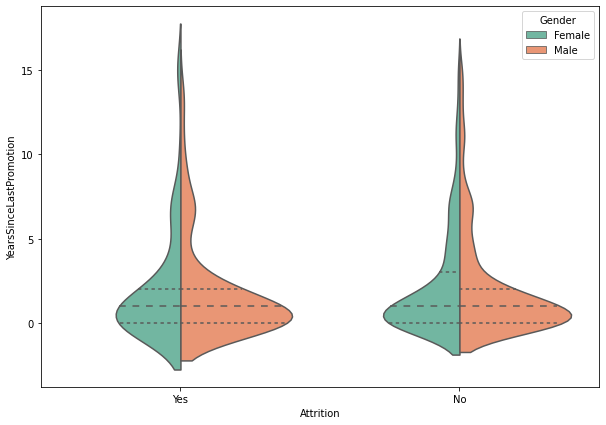

In [48]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

from above plot we have that for both male and female mostly are less than 5 years since they have got promoted

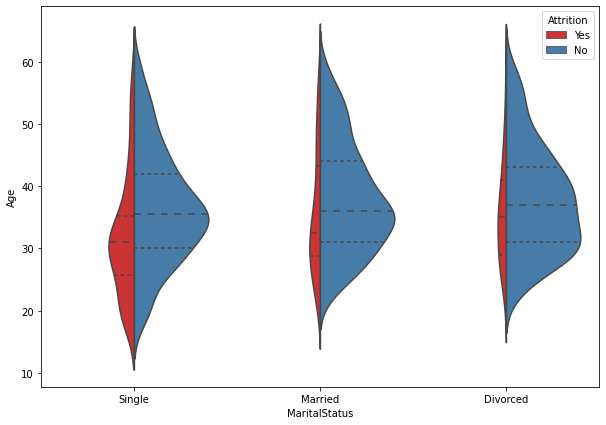

In [49]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

in this plot we can see that there is some Attrition when you are single and less when you are married but little when you are divorced.

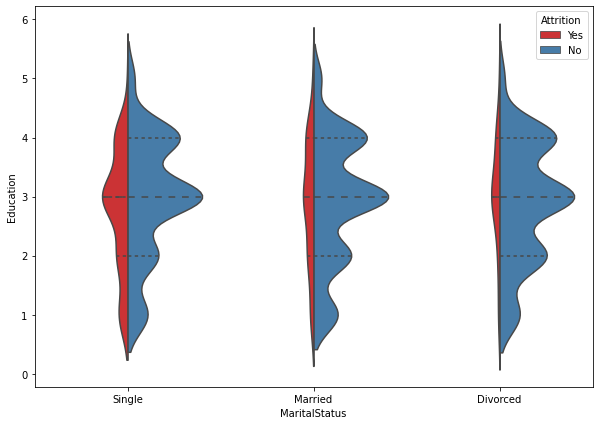

In [50]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

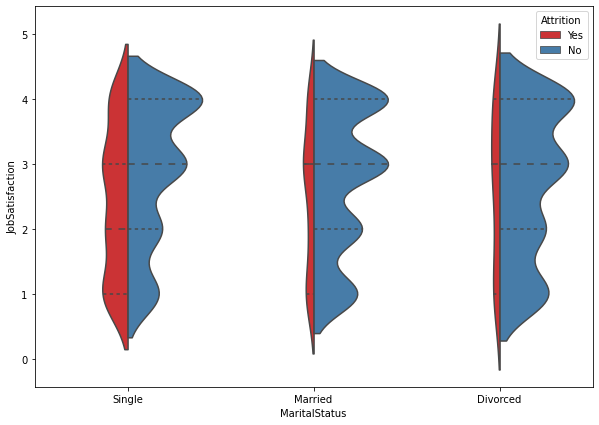

In [51]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

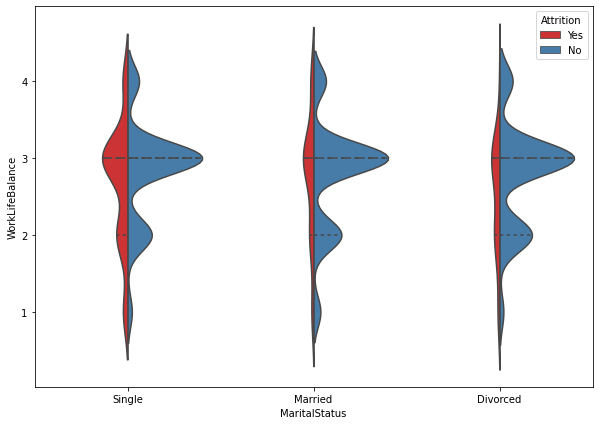

In [52]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

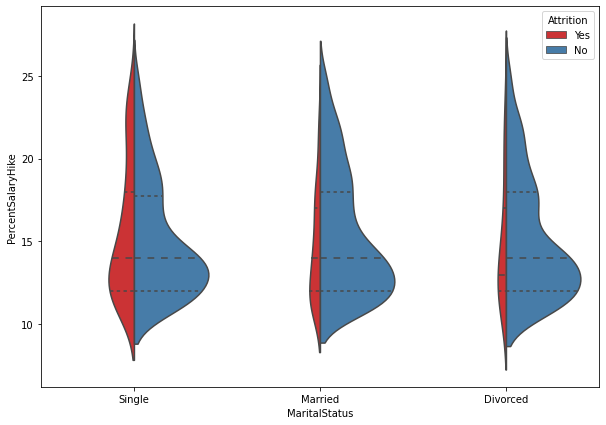

In [53]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()


from the above figure we can say that hike in salary of single is higher than married or some one who got divorced. maybe,perhaps a single have less burden so there work is more effectiove so they get more hike in their salary.

## CHECKING SKEWNESS

In [54]:
# Checking how the data has been distriubted in each column for numerical columns

df.skew().sort_values()

C:\Users\poonam\AppData\Local\Temp/ipykernel_16664/1598848800.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values()


WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
HourlyRate                 -0.032311
DailyRate                  -0.003519
EmployeeCount               0.000000
StandardHours               0.000000
MonthlyRate                 0.018578
Age                         0.413286
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
YearsAtCompany              1.764529
PerformanceRating           1.921883
YearsSinceLastPromotion     1.984290
dtype: float64

We can see in above observation the skewness of joblevel, NumCompaniesWorked,TotalWorkingYears, MonthlyIncome, YearsAtCompany, PerformanceRating ,YearsSinceLastPromotion is very high.

## NORMAL DISTRIBUTION

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

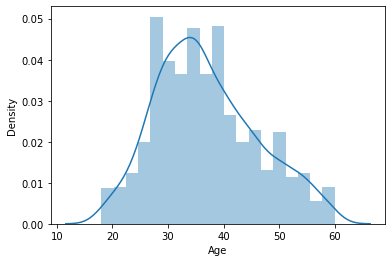

In [55]:
sns.distplot(df['Age'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

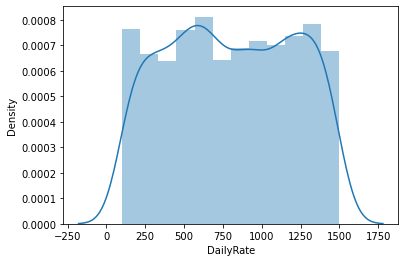

In [56]:
sns.distplot(df['DailyRate'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

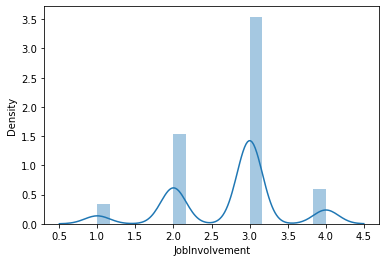

In [57]:
sns.distplot(df['JobInvolvement'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

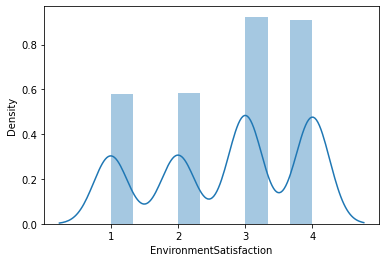

In [58]:
sns.distplot(df['EnvironmentSatisfaction'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

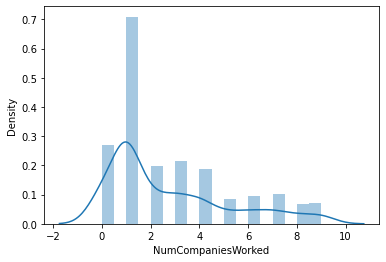

In [59]:
sns.distplot(df['NumCompaniesWorked'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

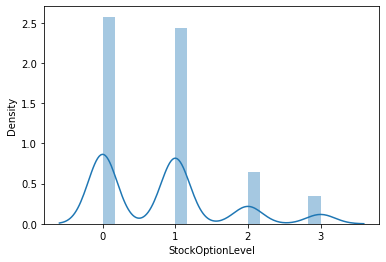

In [60]:
sns.distplot(df['StockOptionLevel'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

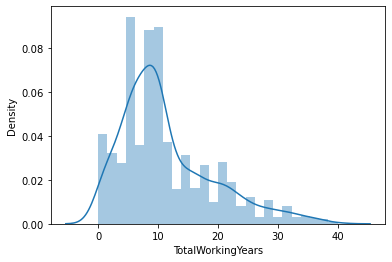

In [61]:
sns.distplot(df['TotalWorkingYears'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

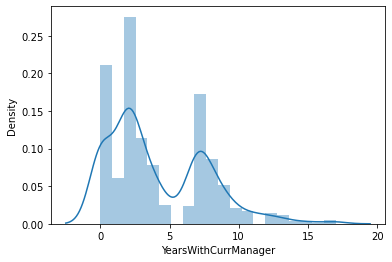

In [62]:
sns.distplot(df['YearsWithCurrManager'])

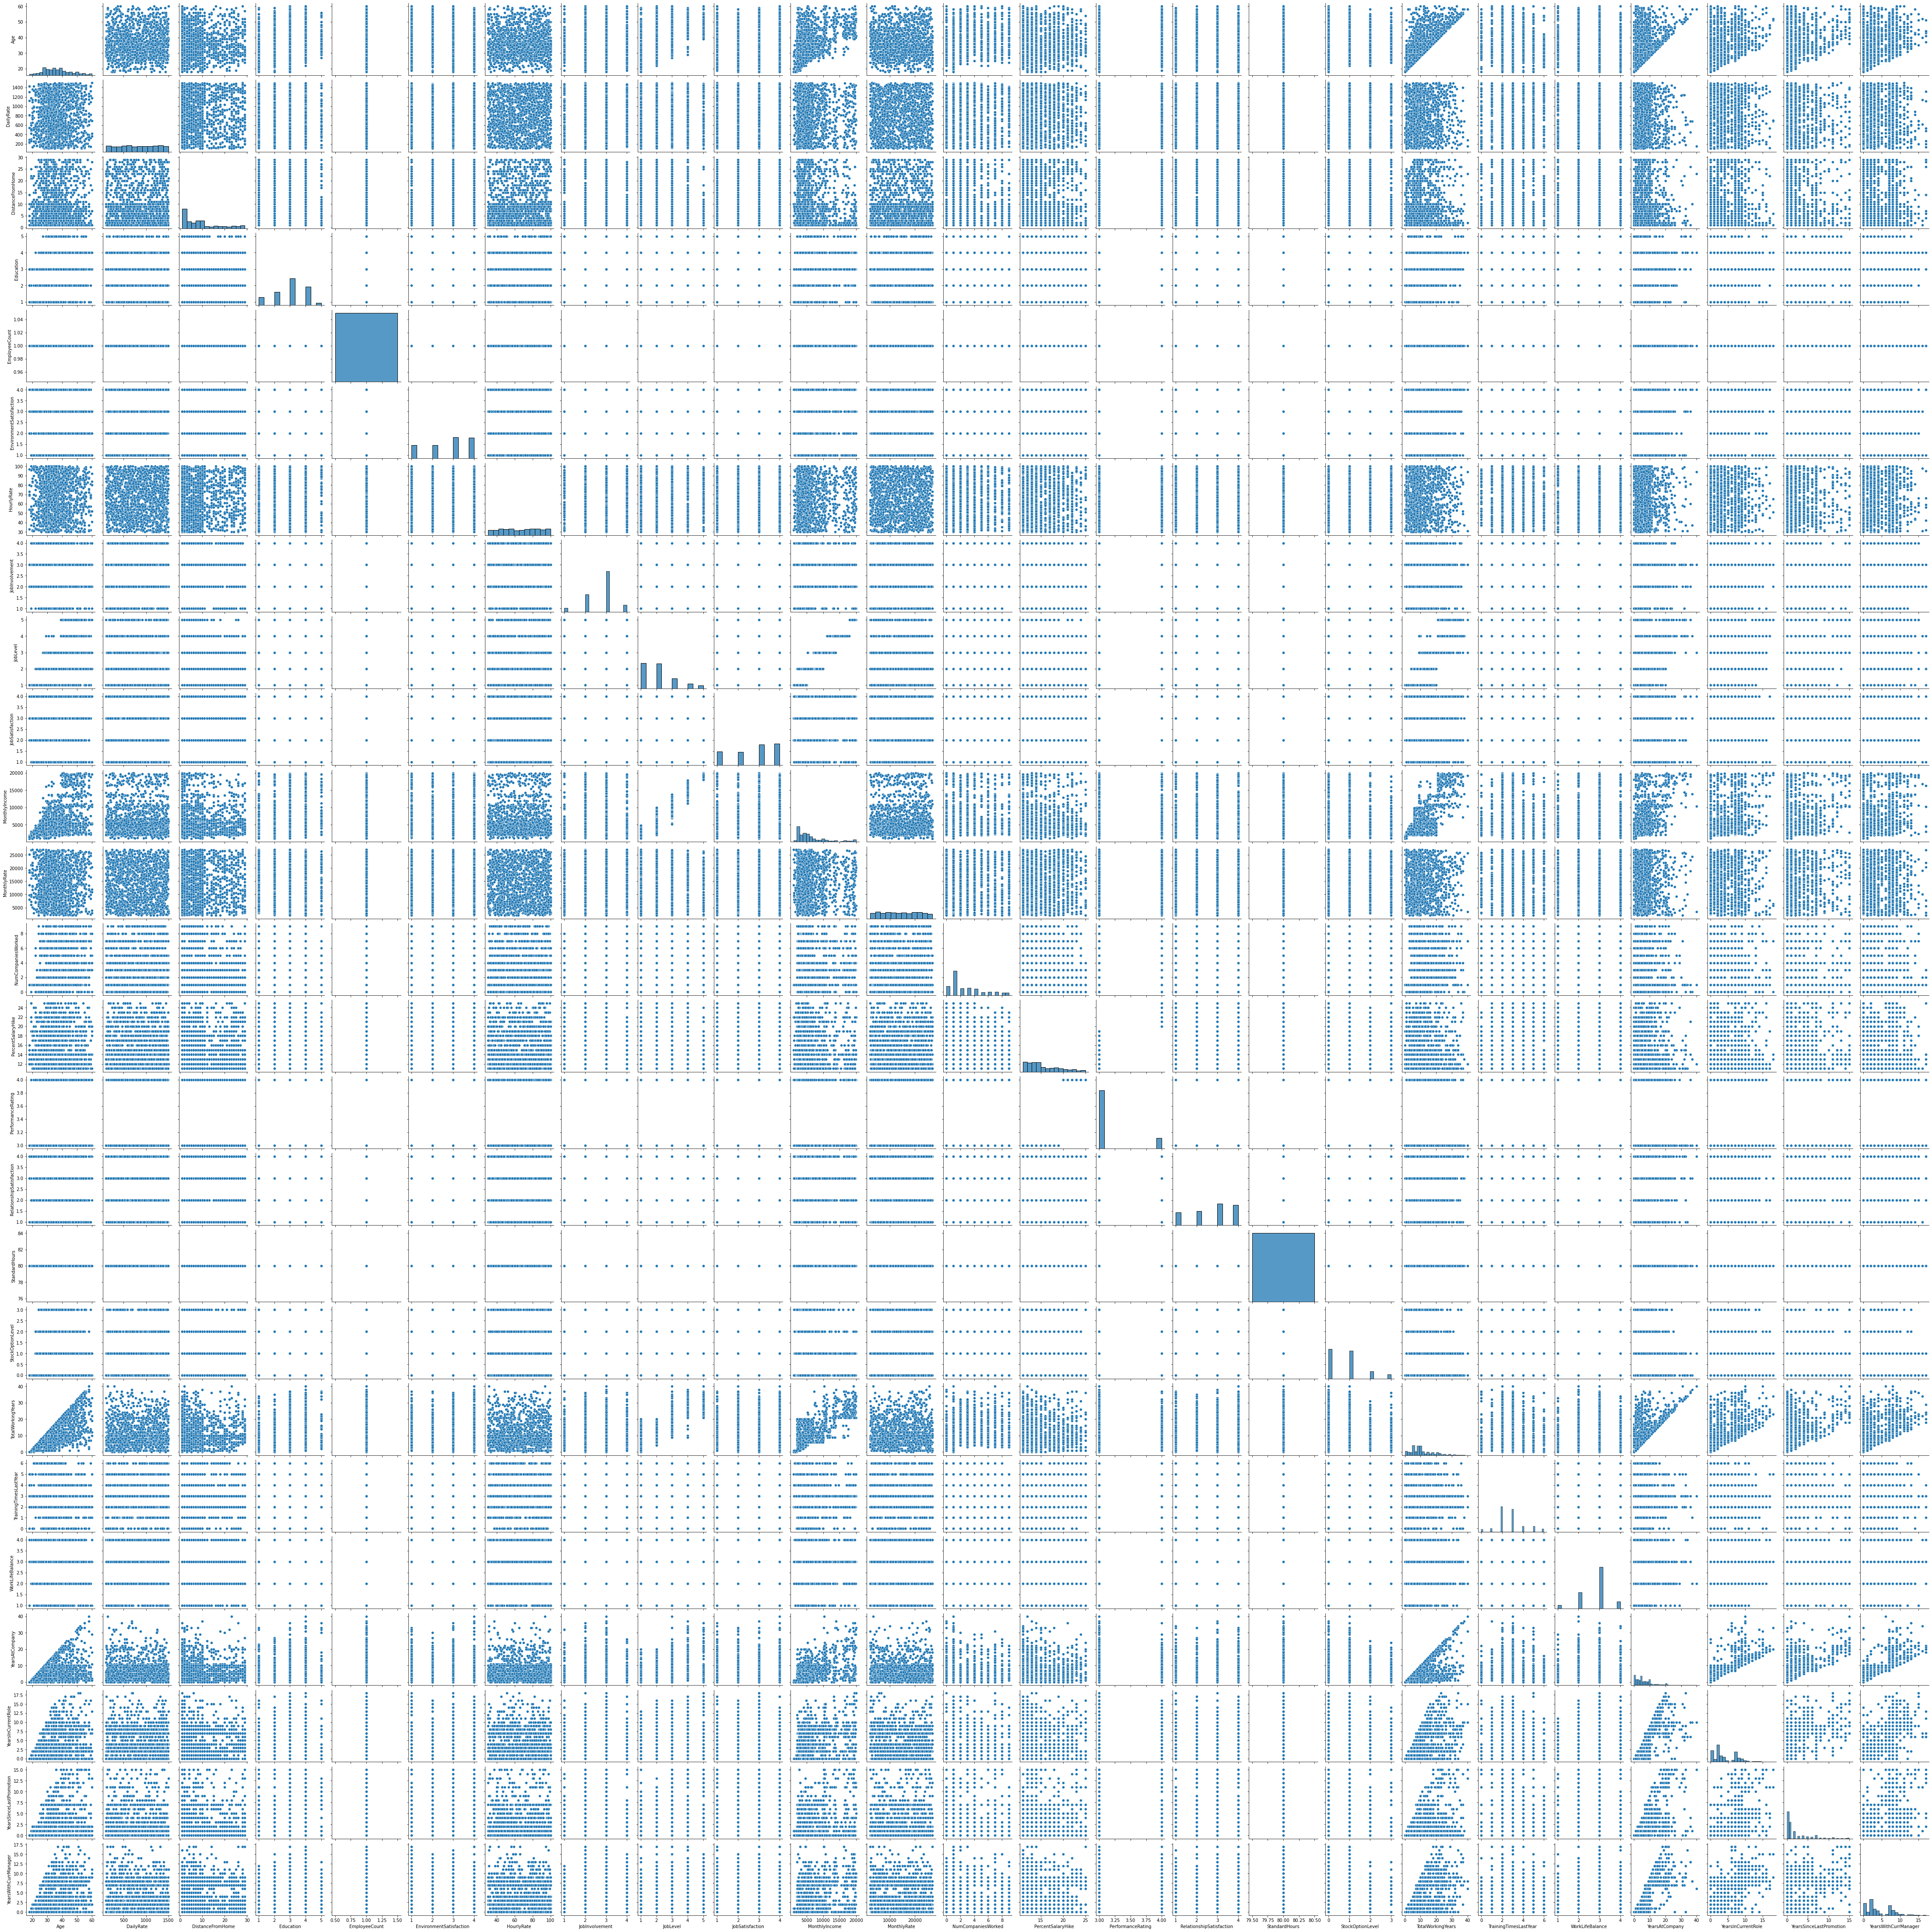

In [63]:
sns.pairplot(df)

## Plotting Outliers

Age                            AxesSubplot(0.125,0.657941;0.0731132x0.222059)
DailyRate                   AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
DistanceFromHome            AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Education                   AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
EmployeeCount               AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
EnvironmentSatisfaction     AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
HourlyRate                  AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
JobInvolvement              AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
JobLevel                    AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
JobSatisfaction                AxesSubplot(0.125,0.391471;0.0731132x0.222059)
MonthlyIncome               AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
MonthlyRate                 AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
NumCompaniesWorked          AxesSubplot(0.388208,0.391471;0.0731

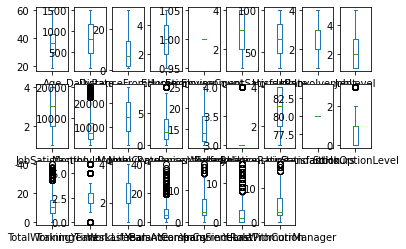

In [64]:
df.plot(kind='box',subplots=True,layout=(3,9))

## Data Preprocessing

In [65]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## ZSCORE

In [66]:
features = df[['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [67]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

MonthlyIncome  NumCompaniesWorked  PerformanceRating  StockOptionLevel  \
0          0.108350            2.125136           0.426230          0.932014   
1          0.291719            0.678049           2.346151          0.241988   
2          0.937654            1.324226           0.426230          0.932014   
3          0.763634            0.678049           0.426230          0.932014   
4          0.644858            2.525591           0.426230          0.241988   
...             ...                 ...                ...               ...   
1465       0.835451            0.523316           0.426230          0.241988   
1466       0.741140            0.523316           0.426230          0.241988   
1467       0.076690            0.678049           2.346151          0.241988   
1468       0.236474            0.277594           0.426230          0.932014   
1469       0.445978            0.277594           0.426230          0.932014   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              0.421642               2.171982        0.164613   
1              0.164511               0.155707        0.488508   
2              0.550208               0.155707        1.144294   
3              0.421642               0.155707        0.161947   
4              0.678774               0.155707        0.817734   
...                 ...                    ...             ...   
1465           0.735447               0.155707        0.327893   
1466           0.293077               1.707500        0.001333   
1467           0.678774               2.171982        0.164613   
1468           0.735447               0.155707        0.325228   
1469           0.678774               0.155707        0.491174   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0               0.063296                 0.679146              0.245834  
1               0.764998                 0.368715              0.806541  
2               1.167687                 0.679146              1.155935  
3               0.764998                 0.252146              1.155935  
4               0.615492                 0.058285              0.595227  
...                  ...                      ...                   ...  
1465            0.615492                 0.679146              0.314873  
1466            0.764998                 0.368715              0.806541  
1467            0.615492                 0.679146              0.314873  
1468            0.488900                 0.679146              1.086895  
1469            0.339394                 0.368715              0.595227  

[1470 rows x 10 columns]

In [68]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                           2  ...                        1             80   
1                           3  ...                        4             80   
2                           4  ...                        2             80   
3                           4  ...                        3             80   
4                           1  ...                        4             80   
...                       ...  ...                      ...            ...   
1465                        3  ...                        3             80   
1466                        4  ...                        1             80   
1467                        2  ...                        2             80   
1468                        4  ...                        4             80   
1469                        2  ...                        1             80   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                    0                  8                     0   
1                    1                 10                     3   
2                    0                  7                     3   
3                    0                  8                     3   
4                    1                  6                     3   
...                ...                ...                   ...   
1465                 1                 17                     3   
1466                 1                  9                     5   
1467                 1                  6                     0   
1468                 0                 17                     3   
1469                 0                  6                     3   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                   1              6                   4   
1                   3             10                   7   
2                   3              0                   0   
3                   3              8                   7   
4                   3              2                   2   
...               ...            ...                 ...   
1465                3              5                   2   
1466                3              7                  

In [69]:
# Shape of new dataframe
new_df.shape

(1387, 33)

## PERCENTAGE DATA LOSS

In [70]:
loss_percent=(1470-1387)/1470*100
print(loss_percent,'%')

5.646258503401361 %


## Checking for skewness

In [71]:
new_df.skew().sort_values()

C:\Users\poonam\AppData\Local\Temp/ipykernel_16664/2767726652.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew().sort_values()


WorkLifeBalance            -0.557100
JobInvolvement             -0.501401
JobSatisfaction            -0.345612
EnvironmentSatisfaction    -0.325285
RelationshipSatisfaction   -0.295686
Education                  -0.289024
HourlyRate                 -0.030481
DailyRate                  -0.017078
EmployeeCount               0.000000
StandardHours               0.000000
MonthlyRate                 0.030596
Age                         0.472280
TrainingTimesLastYear       0.577614
YearsWithCurrManager        0.694506
YearsInCurrentRole          0.726675
PercentSalaryHike           0.800592
DistanceFromHome            0.954752
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
NumCompaniesWorked          1.037715
JobLevel                    1.126075
YearsAtCompany              1.248623
MonthlyIncome               1.544770
YearsSinceLastPromotion     1.756335
PerformanceRating           1.931566
dtype: float64

# Removing skewness using yeo-johnson method

In [72]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager','YearsSinceLastPromotion']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [73]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

C:\Users\poonam\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0         -1.489968  0.349828       0.386674            1.620671   
1          0.244561  0.349828       0.144235           -0.561880   
2         -1.028366 -1.141761      -1.431153            1.273711   
3         -0.698191 -1.141761      -0.814425           -0.561880   
4         -1.028366 -1.141761      -0.504453            1.764103   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0          -1.495549         -1.084263          -0.173231   
1           1.690425          0.548653           0.147620   
2           0.193797         -1.084263          -0.351153   
3          -1.495549         -1.084263          -0.173231   
4          -0.957525          0.548653          -0.544046   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0              -2.608524        0.231837            0.290524   
1               0.217074        0.948319            1.006575   
2               0.217074       -2.156089           -1.571814   
3               0.217074        0.621429            1.006575   
4               0.217074       -0.933983           -0.390769   

   YearsWithCurrManager  YearsSinceLastPromotion  
0              0.582177                -1.073534  
1              1.018073                 0.193168  
2             -1.528426                -1.073534  
3             -1.528426                 1.027520  
4             -0.347871                 0.722874

In [74]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

C:\Users\poonam\AppData\Local\Temp/ipykernel_16664/1350104012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

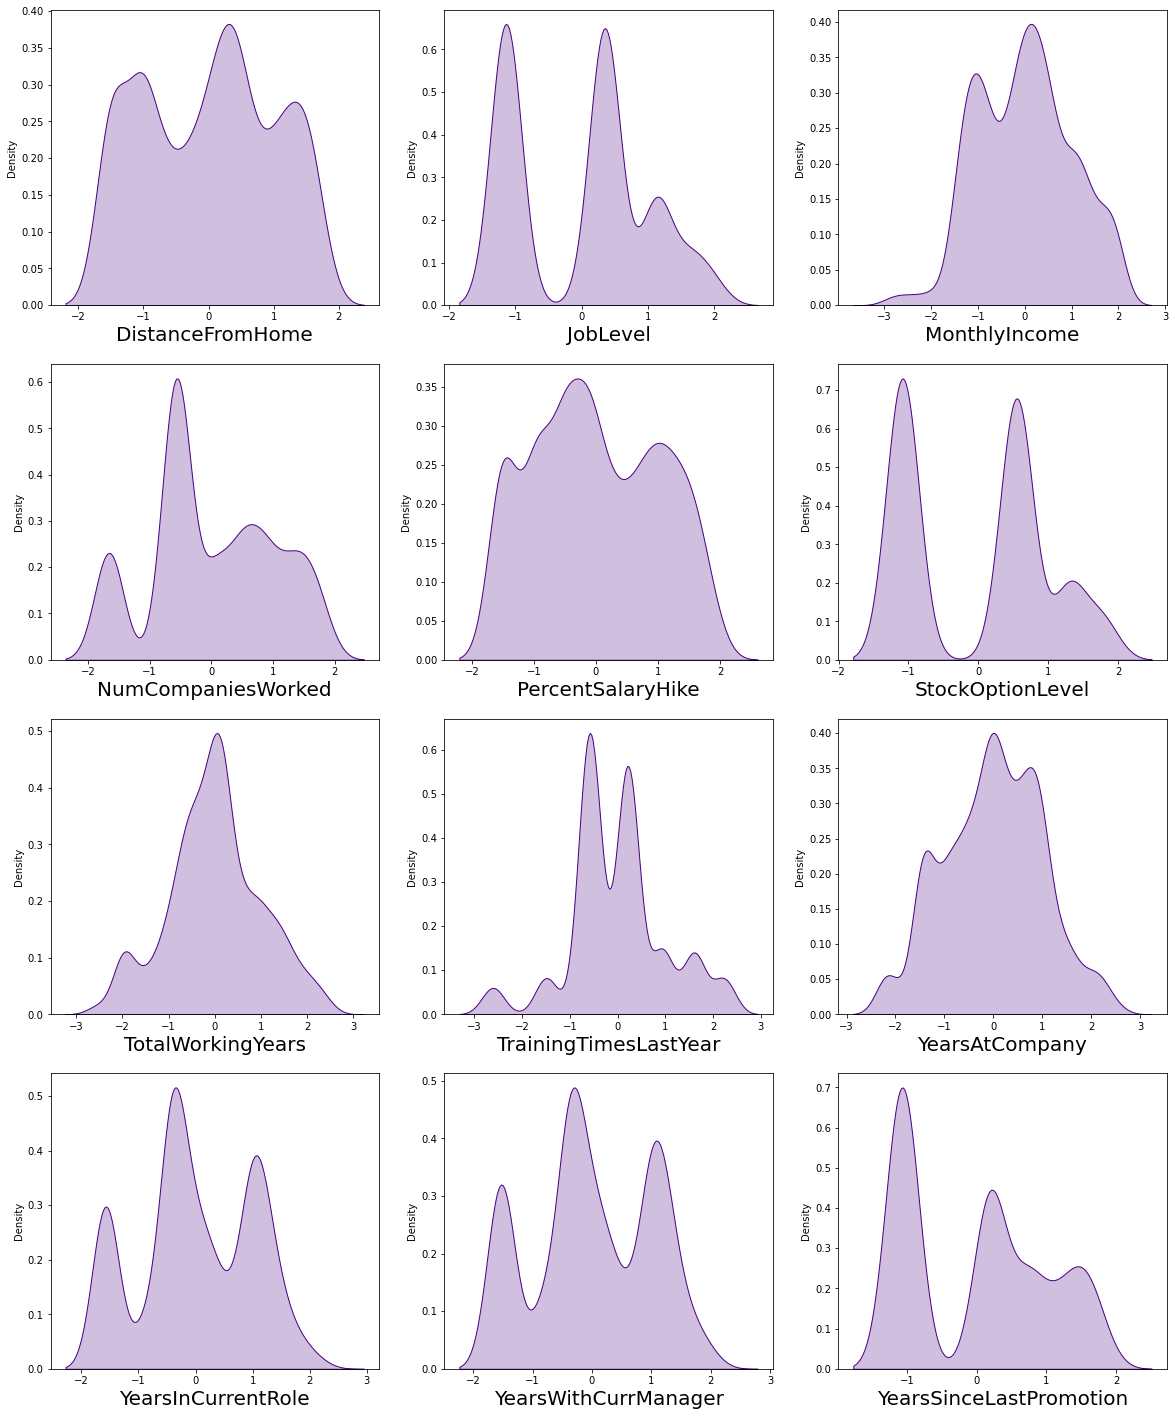

In [75]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Encoding the categorical columns using Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
categorical_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [78]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

C:\Users\poonam\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [79]:
new_df[categorical_col]

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0             1               2           2               1       0        7   
1             0               1           1               1       1        6   
2             1               2           1               4       1        2   
3             0               1           1               1       0        6   
4             0               2           1               3       1        2   
...         ...             ...         ...             ...     ...      ...   
1465          0               1           1               3       1        2   
1466          0               2           1               3       1        0   
1467          0               2           1               1       1        4   
1468          0               1           2               3       1        7   
1469          0               2           1               3       1        2   

      MaritalStatus  OverTime  
0                 2         1  
1                 1         0  
2                 2         1  
3                 1         1  
4                 1         0  
...             ...       ...  
1465              1         0  
1466              1         0  
1467              1         1  
1468              1         0  
1469              1         0  

[1387 rows x 8 columns]

## Checking Correlation

In [80]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159366        0.022340   0.021946   
Attrition                -0.159366   1.000000       -0.001041  -0.057220   
BusinessTravel            0.022340  -0.001041        1.000000  -0.004606   
DailyRate                 0.021946  -0.057220       -0.004606   1.000000   
Department               -0.038242   0.063637       -0.003521  -0.005398   
DistanceFromHome         -0.028793   0.080979       -0.015034  -0.003967   
Education                 0.198502  -0.032703       -0.010560  -0.018442   
EducationField           -0.032676   0.023585        0.022576   0.040645   
EmployeeCount                  NaN        NaN             NaN        NaN   
EnvironmentSatisfaction   0.014098  -0.112393        0.001183   0.033123   
Gender                   -0.039430   0.036252       -0.025364  -0.005242   
HourlyRate                0.025465  -0.001532        0.025424   0.014279   
JobInvolvement            0.036424  -0.133957        0.028261   0.048004   
JobLevel                  0.430414  -0.196464       -0.002398   0.015383   
JobRole                  -0.112957   0.064283        0.000213  -0.015437   
JobSatisfaction           0.011763  -0.114206       -0.032491   0.042698   
MaritalStatus            -0.104372   0.160960        0.018687  -0.074113   
MonthlyIncome             0.436543  -0.207280        0.028387   0.029530   
MonthlyRate               0.026954   0.014888       -0.010307  -0.029844   
NumCompaniesWorked        0.339436   0.047508        0.026929   0.033388   
OverTime                  0.034180   0.257237        0.022378   0.020294   
PercentSalaryHike         0.013248  -0.017523       -0.027934   0.028690   
PerformanceRating        -0.000617   0.010781       -0.018274   0.000574   
RelationshipSatisfaction  0.041744  -0.052344       -0.029660   0.004516   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.077833  -0.175081       -0.012732   0.047773   
TotalWorkingYears         0.634884  -0.220878        0.031888   0.043307   
TrainingTimesLastYear    -0.013707  -0.059071        0.011688   0.006581   
WorkLifeBalance          -0.016913  -0.062492       -0.014140  -0.044266   
YearsAtCompany            0.174149  -0.201954       -0.021107   0.005806   
YearsInCurrentRole        0.118454  -0.187047       -0.032472   0.020542   
YearsSinceLastPromotion   0.103938  -0.050986       -0.027478  -0.035403   
YearsWithCurrManager      0.114962  -0.186821       -0.033222   0.007098   

                          Department  DistanceFromHome  Education  \
Age                        -0.038242         -0.028793   0.198502   
Attrition                   0.063637          0.080979  -0.032703   
BusinessTravel             -0.003521         -0.015034  -0.010560   
DailyRate                  -0.005398         -0.003967  -0.018442   
Department                  1.000000          0.037660   0.012846   
DistanceFromHome            0.037660          1.000000   0.003595   
Education                   0.012846          0.003595   1.000000   
EducationField              0.013432          0.011891  -0.038017   
EmployeeCount                    NaN               NaN        NaN   
EnvironmentSatisfaction    -0.014540         -0.012075  -0.026223   
Gender                     -0.030618          0.010557  -0.019166   
HourlyRate                 -0.002412          0.014926   0.010848   
JobInvolvement             -0.024040          0.036805   0.041343   
JobLevel                    0.203244          0.024038   0.104270   
JobRole                     0.678627          0.009353   0.015140   
JobSatisfaction             0.029521         -0.019334  -0.007219   
MaritalStatus               0.052086         -0.027275  -0.012726   
MonthlyIncome               0.154056          0.000545   0.111594   
MonthlyRate                 0.022741          0.048976  -0.018540   
NumCompaniesWorked         -0.034028         -0.010318   0.137958 

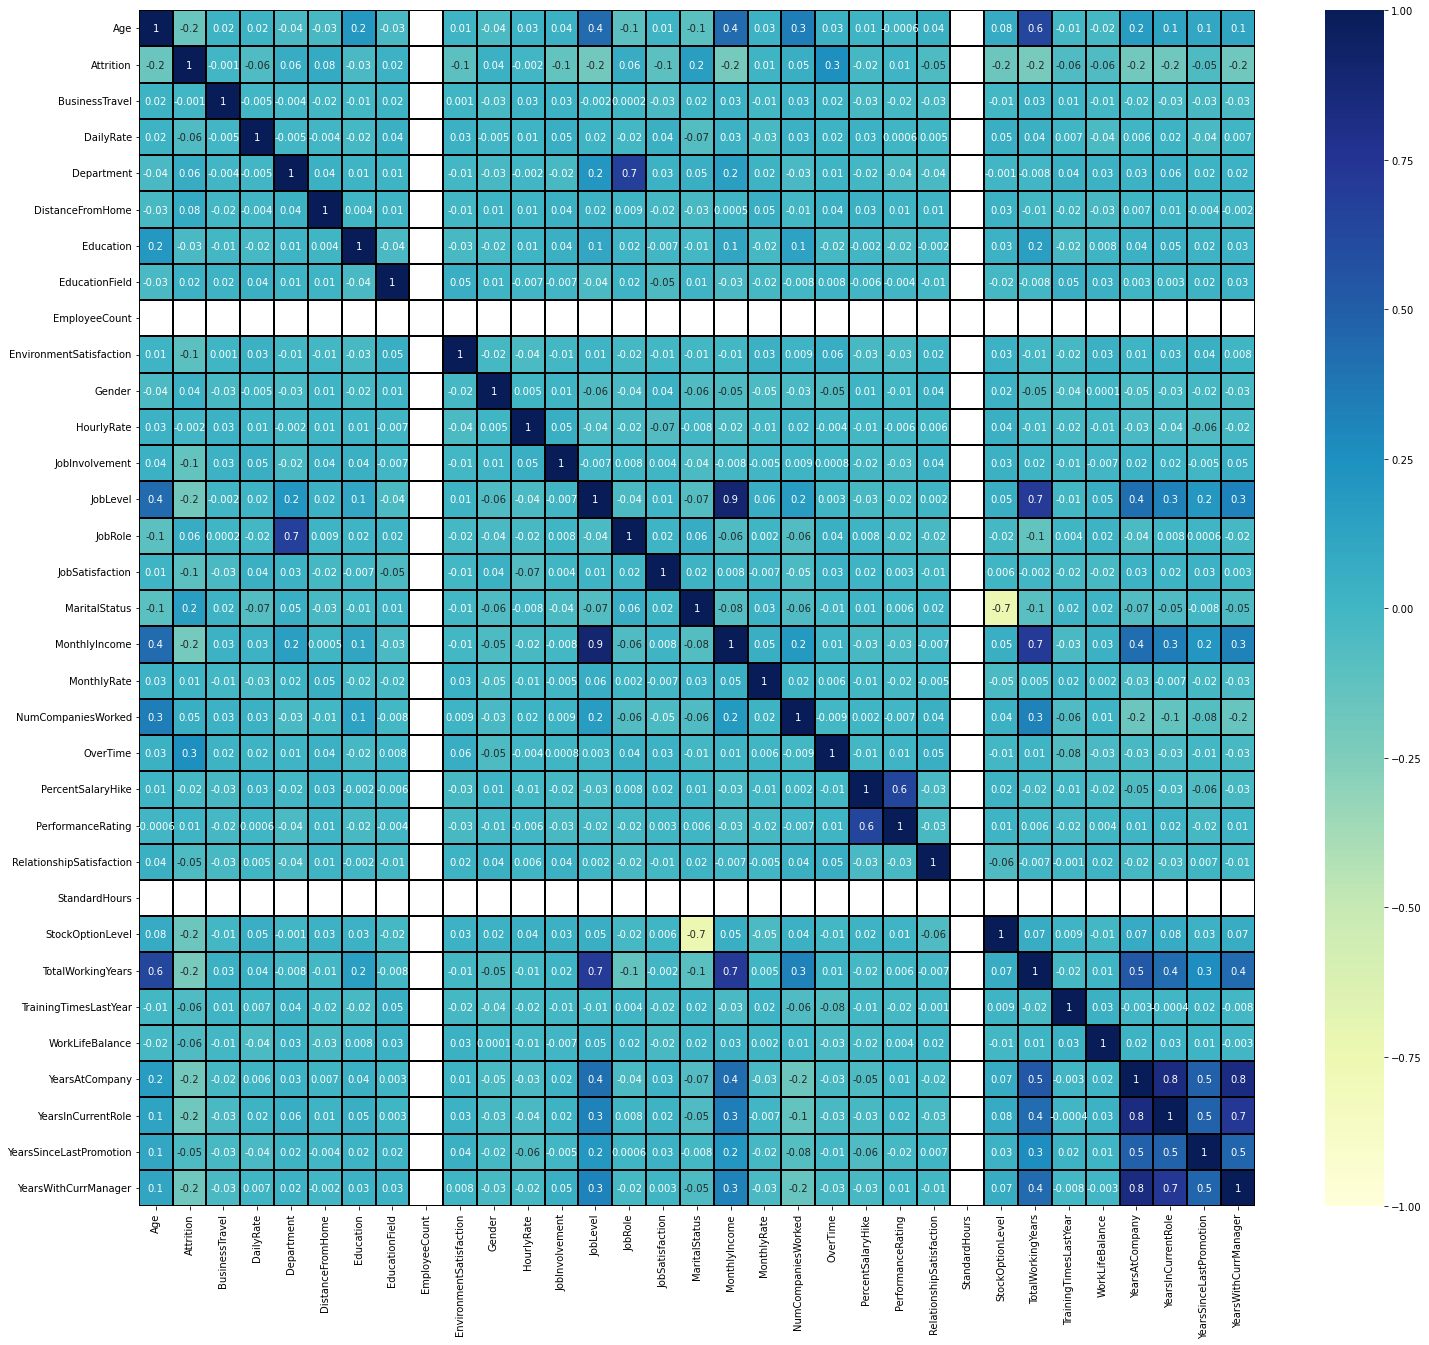

In [81]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

Here we can notice the columns BusinessTravel and HourlyRate have very less corrrelation with the target. Lets drop those columns.

In [82]:
# Dropping irrelevant columns
new_df.drop("BusinessTravel",axis=1, inplace=True)
new_df.drop("HourlyRate",axis=1, inplace=True)

C:\Users\poonam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
new_df.head()

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0   41          1       1102           2         -1.489968          2   
1   49          0        279           1          0.244561          1   
2   37          1       1373           1         -1.028366          2   
3   33          0       1392           1         -0.698191          4   
4   27          0        591           1         -1.028366          1   

   EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  ...  \
0               1              1                        2       0  ...   
1               1              1                        3       1  ...   
2               4              1                        4       1  ...   
3               1              1                        4       0  ...   
4               3              1                        1       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80         -1.084263   
1                         4             80          0.548653   
2                         2             80         -1.084263   
3                         3             80         -1.084263   
4                         4             80          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524                1        0.231837   
1           0.147620               0.217074                3        0.948319   
2          -0.351153               0.217074                3       -2.156089   
3          -0.173231               0.217074                3        0.621429   
4          -0.544046               0.217074                3       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 31 columns]

## Splitting the dataset into Features and Target 

In [84]:
x = new_df.drop("Attrition", axis=1)
y = new_df["Attrition"]

In [85]:
# Dimension of x
x.shape

(1387, 30)

In [86]:
# Dimension of y
y.shape

(1387,)

In [87]:
x.head()

Age  DailyRate  Department  DistanceFromHome  Education  EducationField  \
0   41       1102           2         -1.489968          2               1   
1   49        279           1          0.244561          1               1   
2   37       1373           1         -1.028366          2               4   
3   33       1392           1         -0.698191          4               1   
4   27        591           1         -1.028366          1               3   

   EmployeeCount  EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
0              1                        2       0               3  ...   
1              1                        3       1               2  ...   
2              1                        4       1               2  ...   
3              1                        4       0               3  ...   
4              1                        1       1               3  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80         -1.084263   
1                         4             80          0.548653   
2                         2             80         -1.084263   
3                         3             80         -1.084263   
4                         4             80          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524                1        0.231837   
1           0.147620               0.217074                3        0.948319   
2          -0.351153               0.217074                3       -2.156089   
3          -0.173231               0.217074                3        0.621429   
4          -0.544046               0.217074                3       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 30 columns]

## SMOTE

In [88]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [89]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

## Feature Scaling

In [90]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.732794   0.834487    1.617910         -1.691108  -0.760758   
1     1.668895  -1.277022   -0.351128          0.175003  -1.793533   
2     0.264744   1.529772   -0.351128         -1.194488  -0.760758   
3    -0.203307   1.578519   -0.351128         -0.839266   1.304793   
4    -0.905383  -0.476547   -0.351128         -1.194488  -1.793533   
...        ...        ...         ...               ...        ...   
2311 -0.788370   1.552862   -0.351128         -0.260250   0.272018   
2312 -0.905383  -0.899875   -0.351128          0.588325  -0.760758   
2313  2.487984  -0.050653   -0.351128         -1.135050  -1.793533   
2314 -1.139408   1.516944   -0.351128         -0.433833  -1.793533   
2315  1.551883   0.352150   -0.351128         -1.379819   0.272018   

      EducationField  EmployeeCount  EnvironmentSatisfaction    Gender  \
0          -0.908409            0.0                -0.418480 -1.048679   
1          -0.908409            0.0                 0.508097  0.953580   
2           1.484171            0.0                 1.434675  0.953580   
3          -0.908409            0.0                 1.434675 -1.048679   
4           0.686644            0.0                -1.345058  0.953580   
...              ...            ...                      ...       ...   
2311        1.484171            0.0                 0.508097 -1.048679   
2312       -0.908409            0.0                -1.345058  0.953580   
2313       -0.908409            0.0                 0.508097  0.953580   
2314        1.484171            0.0                -0.418480 -1.048679   
2315       -0.908409            0.0                -1.345058 -1.048679   

      JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
0           0.660282  ...                 -1.443419            0.0   
1          -0.682310  ...                  1.421974            0.0   
2          -0.682310  ...                 -0.488288            0.0   
3           0.660282  ...                  0.466843            0.0   
4           0.660282  ...                  1.421974            0.0   
...              ...  ...                       ...            ...   
2311       -0.682310  ...                  0.466843            0.0   
2312       -0.682310  ...                 -1.443419            0.0   
2313       -0.682310  ...                  1.421974            0.0   
2314       -2.024902  ...                 -0.488288            0.0   
2315       -0.682310  ...                  0.466843            0.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.975666           0.041301              -2.679259   
1             0.747640           0.371082               0.301311   
2            -0.975666          -0.141572               0.301311   
3            -0.975666           0.041301               0.301311   
4             0.747640          -0.339833               0.301311   
...                ...                ...                    ...   
2311         -0.975666          -1.368671               0.443951   
2312         -0.975666          -0.244467              -0.779715   
2313          0.672845          -1.131861               0.171948   
2314         -0.975666          -0.702590               0.177409   
2315          1.196759           0.718513               0.183978   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.115971        0.439924            0.487464   
1            0.551742        1.189552            1.249523   
2            0.551742       -2.058470           -1.494534   
3            0.551742        0.847539            1.249523   
4            0.551742       -0.779828           -0.237604   
...               ...             ...                 ...   
2311        -0.782114       -0.904232           -0.359896   
2312         0.551742       -0.615328           -0.552107   
2313        -0.782114       -1.321417           -1.494534   
2314        -

## VIF Factor 

In [91]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

C:\Users\poonam\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF values                  Features
0     1.926020                       Age
1     1.052360                 DailyRate
2     1.974977                Department
3     1.040752          DistanceFromHome
4     1.078651                 Education
5     1.055328            EducationField
6          NaN             EmployeeCount
7     1.084015   EnvironmentSatisfaction
8     1.048901                    Gender
9     1.102755            JobInvolvement
10    5.769797                  JobLevel
11    1.820155                   JobRole
12    1.071603           JobSatisfaction
13    2.202816             MaritalStatus
14    5.915501             MonthlyIncome
15    1.055957               MonthlyRate
16    1.423588        NumCompaniesWorked
17    1.040354                  OverTime
18    1.490906         PercentSalaryHike
19    1.489443         PerformanceRating
20    1.061785  RelationshipSatisfaction
21         NaN             StandardHours
22    2.185535          StockOptionLevel
23    4.367759         TotalWorkingYears
24    1.040279     TrainingTimesLastYear
25    1.070173           WorkLifeBalance
26    7.064727            YearsAtCompany
27    4.177706        YearsInCurrentRole
28    1.463316   YearsSinceLastPromotion
29    3.769940      YearsWithCurrManager

In [93]:
# DataFrame after preprocessing and data cleaning
new_df.head()

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0   41          1       1102           2         -1.489968          2   
1   49          0        279           1          0.244561          1   
2   37          1       1373           1         -1.028366          2   
3   33          0       1392           1         -0.698191          4   
4   27          0        591           1         -1.028366          1   

   EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  ...  \
0               1              1                        2       0  ...   
1               1              1                        3       1  ...   
2               4              1                        4       1  ...   
3               1              1                        4       0  ...   
4               3              1                        1       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80         -1.084263   
1                         4             80          0.548653   
2                         2             80         -1.084263   
3                         3             80         -1.084263   
4                         4             80          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524                1        0.231837   
1           0.147620               0.217074                3        0.948319   
2          -0.351153               0.217074                3       -2.156089   
3          -0.173231               0.217074                3        0.621429   
4          -0.544046               0.217074                3       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 31 columns]

# MACHINE LEARNING

## Since the y (Target) has Categorical values, we will use Logistic Regression

### FINDING BEST RANDOM STATE

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [97]:
#BEST RANDOM STATE
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state',i)

accuracy 0.8318965517241379 random_state 1
accuracy 0.8318965517241379 random_state 1
accuracy 0.8211206896551724 random_state 2
accuracy 0.8168103448275862 random_state 3
accuracy 0.8383620689655172 random_state 4
accuracy 0.8383620689655172 random_state 4
accuracy 0.8017241379310345 random_state 5
accuracy 0.7995689655172413 random_state 6
accuracy 0.8125 random_state 7
accuracy 0.8232758620689655 random_state 8
accuracy 0.8318965517241379 random_state 9
accuracy 0.8168103448275862 random_state 10
accuracy 0.8232758620689655 random_state 11
accuracy 0.8383620689655172 random_state 12
accuracy 0.8232758620689655 random_state 13
accuracy 0.7952586206896551 random_state 14
accuracy 0.8081896551724138 random_state 15
accuracy 0.8211206896551724 random_state 16
accuracy 0.8168103448275862 random_state 17
accuracy 0.8017241379310345 random_state 18
accuracy 0.8275862068965517 random_state 19
accuracy 0.7974137931034483 random_state 20
accuracy 0.8103448275862069 random_state 21
accuracy 0.

In [98]:
#importing dtc to find out best random state
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [99]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8836206896551724  on Random_state  61


We found out Best Accuracy on Random State 61 using Decision Tree and LogisticRegression

In [100]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [101]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=178)  # random_state 11 was the best random_state
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

# LOGISTIC REGRESSION

In [102]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 81.03448275862068

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       221
           1       0.82      0.81      0.82       243

    accuracy                           0.81       464
   macro avg       0.81      0.81      0.81       464
weighted avg       0.81      0.81      0.81       464

Cross Validation Score: 81.00701943844491

Accuracy Score - Cross Validation Score is 0.027463320175769468


# GAUSSIAN NAIVE BAYES

In [103]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 76.72413793103449

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       221
           1       0.77      0.79      0.78       243

    accuracy                           0.77       464
   macro avg       0.77      0.77      0.77       464
weighted avg       0.77      0.77      0.77       464

Cross Validation Score: 75.65325463618082

Accuracy Score - Cross Validation Score is 1.0708832948536724


# SVC CLASSIFIER

In [104]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 87.06896551724138

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       221
           1       0.88      0.87      0.88       243

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464

Cross Validation Score: 86.32140463245699

Accuracy Score - Cross Validation Score is 0.7475608847843915


In [105]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 82.11206896551724

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       221
           1       0.84      0.81      0.83       243

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       0.82      0.82      0.82       464

Cross Validation Score: 80.31661949802637

Accuracy Score - Cross Validation Score is 1.7954494674908688


In [106]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 86.85344827586206

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       221
           1       0.84      0.92      0.88       243

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464

Cross Validation Score: 86.40211886497356

Accuracy Score - Cross Validation Score is 0.45132941088850487


# DECISION TREE CLASSIFIER

In [107]:
model = DecisionTreeClassifier(random_state=75)
classifier(model, x, y)

Accuracy Score: 82.54310344827587

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       221
           1       0.85      0.81      0.83       243

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

Cross Validation Score: 82.39135696730469

Accuracy Score - Cross Validation Score is 0.15174648097118393


# K NEIGHBORS CLASSIFIER

In [108]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 82.75862068965517

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.67      0.79       221
           1       0.76      0.97      0.86       243

    accuracy                           0.83       464
   macro avg       0.86      0.82      0.82       464
weighted avg       0.85      0.83      0.82       464

Cross Validation Score: 82.29742310270352

Accuracy Score - Cross Validation Score is 0.4611975869516556


# RANDOM FOREST CLASSIFIER

In [109]:
model = RandomForestClassifier(random_state=75)
classifier(model, x, y)

Accuracy Score: 91.37931034482759

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       221
           1       0.97      0.86      0.91       243

    accuracy                           0.91       464
   macro avg       0.92      0.92      0.91       464
weighted avg       0.92      0.91      0.91       464

Cross Validation Score: 89.7351418783049

Accuracy Score - Cross Validation Score is 1.644168466522686


In [114]:
classifier(model, x, y) 

Accuracy Score: 91.37931034482759

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       221
           1       0.97      0.86      0.91       243

    accuracy                           0.91       464
   macro avg       0.92      0.92      0.91       464
weighted avg       0.92      0.91      0.91       464

Cross Validation Score: 89.7351418783049

Accuracy Score - Cross Validation Score is 1.644168466522686


# EXTRATREES CLASSIFIER

In [115]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 91.8103448275862

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       221
           1       0.96      0.88      0.92       243

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464

Cross Validation Score: 91.67293513070678

Accuracy Score - Cross Validation Score is 0.1374096968794305


# ADA BOOST CLASSIFIER

In [116]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 89.65517241379311

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       221
           1       0.91      0.88      0.90       243

    accuracy                           0.90       464
   macro avg       0.90      0.90      0.90       464
weighted avg       0.90      0.90      0.90       464

Cross Validation Score: 85.46147687495343

Accuracy Score - Cross Validation Score is 4.193695538839677


# GRADIENT BOOSTING CLASSIFIER

In [117]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 90.73275862068965

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       221
           1       0.97      0.85      0.91       243

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464

Cross Validation Score: 87.40615923139941

Accuracy Score - Cross Validation Score is 3.3265993892902372


OBSERVATION

IN EXTRATREES CLASSIFIER, R2 SCORE- CV SCORE IS LEAST ALONGWITH R2 SCORE IS HIGHEST . SO WE CHOOSE EXTRATREES CLASSIFIER BEST MODEL FOR THIS PROBLEM

# HYPER PARAMETER TUNIN

In [118]:
#creating parameters to pass into GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15],
              'random_state' : [None, 178]}

In [119]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [120]:
GCV.fit(x,y)

C:\Users\poonam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\poonam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\poonam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15], 'random_state': [None, 178]})

In [121]:
#printing best parameters found by GridSearchCV
GCV.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_jobs': 5,
 'random_state': 178}

# FINAL MODEL

In [122]:
final_model = ExtraTreesClassifier(criterion = 'entropy', max_features = 'log2', n_jobs = 10, random_state = None)

In [123]:
#final fit
final_fit = final_model.fit(x_train,y_train)

In [124]:
#predicting with best parameters
final_pred = final_model.predict(x_test)

In [125]:
#checking accuracy score
best_acc_score = (accuracy_score(y_test, final_pred))*100   
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  93.53448275862068


In [126]:
#lets use cross_val_score
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 91.9754971326432


# AUC ROC

C:\Users\poonam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


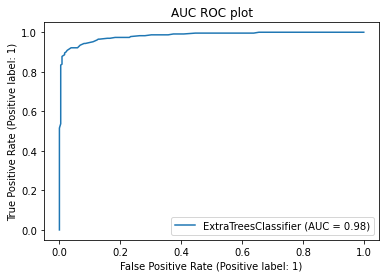

In [127]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

# SAVING MODEL IN PICKLE FORMAT

In [128]:
# pickeling or serialization of a file
import pickle
filename = 'HR_Analytics_Project_Final_Model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# PREDICTED COCLUSION

In [129]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

original  predicted
0           0          0
1           1          1
2           1          1
3           1          1
4           0          0
..        ...        ...
459         0          0
460         0          0
461         1          1
462         1          1
463         0          0

[464 rows x 2 columns]

In [130]:
#saving my comparision
df_comparison.to_csv('HR_Analytics_Project_Prediction.csv')

### FINAL OBSERVATION Best Model for this Problem is found to be "EXTRA TREE CLASSIFIER" with best accuracy of 93% ondataset. Inorder to avoid the attrition the company should hire the right candidate, second is one should provide a Positive workplace environment and flexibility to the employee. Third thing is prioritize employee happiness and Satisfaction.